In [15]:
import torch
import torch.distributions as dist
import torch.nn as nn

import matplotlib.pyplot as plt

In [3]:
M = 5

In [23]:
v = torch.randn(1, 6 * M + 3)

In [24]:
# (1, 5) -> ( x,y ) ( q )

# last 3 dimensions: the categorical over q

q = dist.OneHotCategorical(logits=v[:, -3:]).sample()
q

tensor([[0., 1., 0.]])

In [28]:
rest = v[:,:-3]
rest = rest.reshape(-1, M, 6)
rest

tensor([[[-0.9735, -0.2348, -0.0195,  0.5253,  0.4564, -0.0032],
         [-1.5722, -0.3582, -1.4675, -1.9164, -0.5448,  0.7911],
         [ 0.8791,  0.5442, -1.4055,  1.7757,  0.9046,  0.9978],
         [-1.4255,  0.2675, -2.1488, -1.1126,  1.9358, -0.3676],
         [-1.5454,  0.4671, -0.9608,  0.5331,  0.6546,  1.1907]]])

In [35]:
pi = rest[:,:,0].softmax(-1)
pi

tensor([[0.1096, 0.0602, 0.6986, 0.0697, 0.0619]])

In [36]:
mu = rest[:,:,1:3]
mu

tensor([[[-0.2348, -0.0195],
         [-0.3582, -1.4675],
         [ 0.5442, -1.4055],
         [ 0.2675, -2.1488],
         [ 0.4671, -0.9608]]])

In [40]:
sigma = rest[:,:,3:5].exp()
sigma

tensor([[[1.6909, 1.5784],
         [0.1471, 0.5800],
         [5.9046, 2.4709],
         [0.3287, 6.9295],
         [1.7042, 1.9245]]])

In [54]:
rho = rest[:,:,-1].tanh()
rho

tensor([[-0.0032,  0.6590,  0.7607, -0.3519,  0.8308]])

In [55]:
# dist.Normal(mu, sigma).sample()

## Bivariate gaussian example below

tensor([[9.0000, 1.5000],
        [1.5000, 1.0000]])

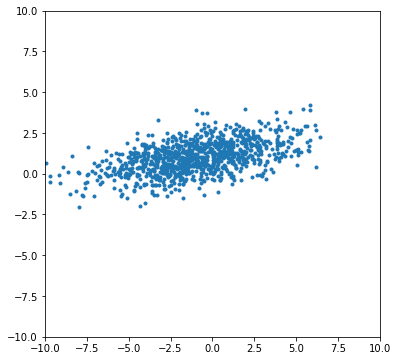

In [89]:
mu = torch.FloatTensor([-1, 1])
sigma = torch.FloatTensor([3.0, 1.0])
cov = torch.diag(sigma**2)
rho = 0.5 # [-1, 1]
cov[1,0] = rho * sigma[0] * sigma[1]
cov[0,1] = cov[1,0]

tmp = dist.MultivariateNormal(mu, covariance_matrix=cov).sample((1000,))
plt.figure(figsize=(6,6))
plt.plot(tmp[:,0], tmp[:,1], '.')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
cov

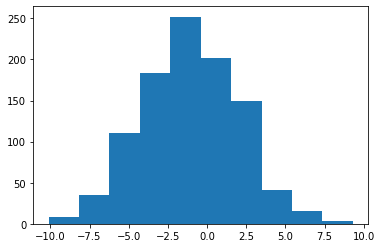

In [86]:
plt.hist(tmp[:,0].squeeze().numpy());

In [16]:
z = torch.randn(100, 2 * 128)
print(z.shape)
h,c = torch.split(nn.Tanh(z), 128, 1)
print(h.shape)
print(c.shape)
# print(v.shape)
# x = v.unsqueeze(0)
# print(x.shape)


# hidden,cell = torch.split(F.tanh(self.fc_hc(z)),hp.dec_hidden_size,1)
#             hidden_cell = (hidden.unsqueeze(0).contiguous(), cell.unsqueeze(0).contiguous())

torch.Size([100, 256])


TypeError: __init__() takes 1 positional argument but 2 were given